# Analysis of the Licence Datase
### Question 1: *Using a variable of the dataset, how can we distinguish each elevator ?*

In [1]:
import pandas as pd
altered = pd.read_json("../data/raw/altered.json")
altered.head(1)

,originating service request number,Alteration Customer,Summary,Elevating Devices Number,Inspection number,Alteration Location,Alteration Type,Status of Alteration Request,Alteration contractor name,Billing Customer
0,782682,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,Minor B Alteration Machine Guarding,8,NaN,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,ED-Minor B Alteration,Passed,NaN,THYSSENKRUPP ELEVATOR (CANADA) LTD


In [2]:
incident = pd.read_json("../data/raw/incident.json")
incident.head(1)

,Incident Number,Creation Date,Fatal Injury Victim,Concussion Intracranial Inju,Burns Severe,Burns Minor,Whiplash,Spinal Injury,Amputation,Injury Leading Deafness,...,No Injury,elevating devices number,Specific Root Cause,Reported occurrence narrative,Time of Occurrence,Summarized detail of Inspection and tests,Inspector's Conclusion,Incident Summary,Task Number,release
0,518574,14-Jan-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,22202,None,Elevator-Flood on 13th floor ran down the stai...,2:00:00 PM,None,None,ED-Near Miss,3200103,yes


In [3]:
inspection = pd.read_csv("../data/raw/inspection.csv")
inspection.head(1)

,originatingservicerequestnumber,InspectionCustomer,ElevatingDevicesNumber,InspectionNumber,InspectionLocation,InspectionType,Earliest_INSPECTION_Date,Latest_INSPECTION_Date,InspectionOutcome
0,55620,LANDSCAPE COURT APARTMENTS LTD,9948,3157237,10 WYCOMBE RD DOWNSVIEW M3M 2W7 ON CA,ED-Followup Inspection,1/10/2011,1/10/2011,Passed


In [4]:
installed = pd.read_json("../data/raw/installed.json")
installed.head(1)

,Elevating devices number,Owner Name,Owner Address,Owner Account Number,Device Class,Device Type,DeviceStatus,Location of Device,under review
0,8,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,redacted,Elevators,Passenger Elevator,Active,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,N


In [5]:
license = pd.read_csv("../data/raw/licence.csv")
license.head(1)

,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT
0,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,EDLIC-000010,ACTIVE,28-Apr-17,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,data redacted,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,data redacted


In [6]:
order = pd.read_csv("../data/raw/order.csv")
order.head(1)

,ElevatingDevicesNumber,TSSAStandardOrderNumber,RegulationReference,ClauseNumber,ClauseText,DIRECTIVE,Inspectionsadditionalinformation,RISKSCORE,Inspection_type,DateofIssue,StatusofInspectionOrder,inspectionnumber,DaystoComply,ComplianceDate,customerorderedtocomply
0,10,NaN,NaN,NaN,NaN,NaN,Top of Car and Hoistway -other**make the car t...,22.0,ED-Followup Inspection,3/5/2012 14:08,RESOLVED,3747366,1.0,3/6/2012,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...


### Conclusion: *We can fairly determine that the following columns refer to the same variable:* "Elevating Devices Number", "elevating devices number" "ElevatingDevicesNumber", "Elevating devices number"
- - - 

### Question 2: *Where are the majority of elevators located ?*

In [7]:
#Add new columns for State/Province and Country
license["State/Province"] = license["LocationoftheElevatingDevice"].str.slice(-5,-3)
license["Country"] = license["LocationoftheElevatingDevice"].str.slice(-2)
license[["State/Province","Country"]]

,State/Province,Country
0,ON,CA
1,ON,CA
2,ON,CA
3,ON,CA
4,ON,CA
...,...,...
45378,ON,CA
45379,ON,CA
45380,ON,CA
45381,ON,CA


In [8]:
license.groupby("State/Province").count()

,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT,Country
State/Province,,,,,,,,,,,,
ON,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340,45340


### Conclusion: *Given that all ElevatingDevices are from "ON, CA", we can say with great confidence that this is where the majority are located*
- - -

### Question 3: *How should we filter the “LICENSE STATUS” variable?*

In [9]:
license = pd.read_csv("../data/raw/licence.csv")
license.groupby("LICENSESTATUS").count()

,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT
LICENSESTATUS,,,,,,,,,,
ACTIVE,42665,42625,42665,42665,42665,42665,42665,42665,42665,42665
BY REQUEST,337,337,337,337,337,337,337,337,337,337
CANCELLED,3,3,3,3,3,3,3,3,3,3
CANCELLED_BY_CUST_REQ,6,6,6,6,6,6,6,6,6,6
CANCELLED_NOT_RENEWED,1163,1161,1163,1163,1163,1163,1163,1163,1163,1163
ENTERED,4,4,4,4,4,4,4,4,4,4
EXPIRED,68,68,68,68,68,68,68,68,68,68
HOLD_TSD,24,24,24,24,24,24,24,24,24,24
PENDING_RENEWAL,632,631,632,632,632,632,632,632,632,632


With the above output, we can see that most of the data concern licenses that have an ACTIVE status. A possible filter to apply would be to remove anything that isn't ACTIVE.

In [10]:
license = license[license["LICENSESTATUS"] == "ACTIVE"]
license.head()

,ElevatingDevicesNumber,LocationoftheElevatingDevice,ElevatingDevicesLicenseNumber,LICENSESTATUS,LICENSEEXPIRYDATE,LICENSEHOLDER,LICENSEHOLDERACCOUNTNUMBER,LICENSEHOLDERADDRESS,BILLINGCUSTOMER,BILLINGADDRESS,BILLINGACCOUNT
0,10,111 WELLESLEY ST W TORONTO M7A 1A2 ON CA,EDLIC-000010,ACTIVE,28-Apr-17,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,data redacted,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,LEGISLATIVE ASSEMBLY OF ONTARIO ATTN: JOHN ED...,99 WELLESLEY ST W WHITNEY BLOCK ROOM 2540 TOR...,data redacted
4,1009,404 MAIN ST WOODSTOCK N4S 7X5 ON CA,EDLIC-001009,ACTIVE,15-Jul-17,AGRIBRANDS PURINA CANADA INC,data redacted,404 MAIN ST PO BOX 250 WOODSTOCK ON N4S 7X5 CA,AGRIBRANDS PURINA CANADA INC,"404 MAIN ST PO BOX 250 WOODSTOCK, ON, N4S 7X5, CA",data redacted
7,10145,45 SECOND ST E CORNWALL K6H 1V5 ON CA,EDLIC-010145,ACTIVE,15-Mar-17,CORNWALL PUBLIC LIBRARY,data redacted,45 SECOND ST E P.O.BOX 939 CORNWALL ON K6H 5V1 CA,CORNWALL PUBLIC LIBRARY,"45 SECOND ST E P.O.BOX 939 CORNWALL, ON, K6H 5...",data redacted
8,1018,150 SIMCOE ST LONDON N6A 4M3 ON CA,EDLIC-001018,ACTIVE,15-Oct-17,LABATT LONDON -LONDON BREWERY,data redacted,150 SIMCOE ST PO BOX 5050 STN B LONDON ON N6A ...,LABATT LONDON -LONDON BREWERY,"150 SIMCOE ST PO BOX 5050 STN B LONDON, ON, N6...",data redacted
9,1019,150 SIMCOE ST LONDON N6A 4M3 ON CA,EDLIC-001019,ACTIVE,15-Oct-17,LABATT LONDON -LONDON BREWERY,data redacted,150 SIMCOE ST PO BOX 5050 STN B LONDON ON N6A ...,LABATT LONDON -LONDON BREWERY,"150 SIMCOE ST PO BOX 5050 STN B LONDON, ON, N6...",data redacted


### Conclusion: *We have now filtered the licenses to keep only those that are ACTIVE. Of course, what would be the best filter to apply is debatable depending on the context and the intended purpose. Other possibilities would have been to mark everything that is not active as INACTIVE, to combine similar statuses (e.g. TERMINATED and TERMINATED DECEASED), etc.*
- - -

### Question 4: *Is the variable you chose in the first question unique ? How can we verify this assumption ?*

In [11]:
amountOfUnique = len(license["ElevatingDevicesNumber"].unique())
total = license["ElevatingDevicesNumber"].count()
amountOfUnique == total

True

### Conclusion: *Given that we have exactly the same amount of license and unique ElevatingDevicesNumber, we can confirm that this variable is indeed unique.*
- - -

### Question 5: *The “LICENCE EXPIRY DATE” variable can be used to plot a time series. We want to know the count of expiration by month.*

<AxesSubplot:xlabel='LICENSEEXPIRYMONTH'>

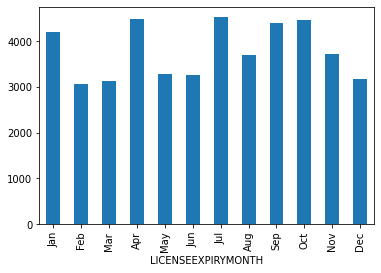

In [15]:
license = pd.read_csv("../data/raw/licence.csv")
license = license[license["LICENSEEXPIRYDATE"] != 0]
license["LICENSEEXPIRYDATE"] = pd.to_datetime(license["LICENSEEXPIRYDATE"], format = "%d-%b-%y")
license["LICENSEEXPIRYMONTH"] = license["LICENSEEXPIRYDATE"].dt.month_name().str[:3]
license["LICENSEEXPIRYMONTH"] = pd.Categorical(license["LICENSEEXPIRYMONTH"], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
licenceExpiryPerMonth = license.groupby(license["LICENSEEXPIRYMONTH"]).count()
licenceExpiryPerMonth["LICENSEEXPIRYDATE"].plot(kind="bar")
#This seems to be a very convulated way to achieve the result expected, I will look into a better solution

### Conclusion: *We can *
- - -